In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import warnings
warnings.filterwarnings("ignore") 
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv(r"C:\Users\ramya\Copper_Set_New.csv", encoding = 'cp1252')

In [5]:
sklearn.__version__


'1.2.2'

In [3]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
# Checking The Null Values :

df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
# Checking The Unique Values Of All The Columns :

for i in df.columns:
    print (i,':',df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16410
product_ref : 33
delivery date : 28
selling_price : 9795


In [7]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
# Converting The Datatypes:

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors= "coerce")
df['item_date_1'] = pd.to_datetime(df['item_date'], format= "%Y%m%d", errors = "coerce").dt.date
df['delivery_date_1'] = pd.to_datetime(df['delivery date'], format= "%Y%m%d", errors = "coerce").dt.date

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181671 non-null  object 
 1   item_date        181672 non-null  float64
 2   quantity tons    181672 non-null  float64
 3   customer         181672 non-null  float64
 4   country          181645 non-null  float64
 5   status           181671 non-null  object 
 6   item type        181673 non-null  object 
 7   application      181649 non-null  float64
 8   thickness        181672 non-null  float64
 9   width            181673 non-null  float64
 10  material_ref     103754 non-null  object 
 11  product_ref      181673 non-null  int64  
 12  delivery date    181672 non-null  float64
 13  selling_price    181672 non-null  float64
 14  item_date_1      181670 non-null  object 
 15  delivery_date_1  181670 non-null  object 
dtypes: float64(9), int64(1), object(6)
mem

In [10]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery_date_1        3
dtype: int64

In [11]:
# removing the "00000" datas in the "material_ref" column :

df['material_ref'] = df['material_ref'].apply(lambda x : np.nan if str(x).startswith("00000") else x)

In [12]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77955
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery_date_1        3
dtype: int64

In [13]:
# "material_ref" have the maximum null values , so we want to drop the column.
# "id" is a unique value , so we want to drop the column

df.drop(columns = ['id', 'material_ref'], inplace = True)

In [14]:
df.isnull().sum()

item_date           1
quantity tons       1
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       1
item_date_1         3
delivery_date_1     3
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [16]:
# 'quantity tons' and 'selling_price' has a negative value, this is impossible, so we need to replace the null values:

# converting the nagative values into null values:

df['quantity tons'] = df['quantity tons'].apply(lambda x : np.nan if x <= 0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x : np.nan if x <= 0 else x)


In [17]:
df.nunique()

item_date             252
quantity tons      181668
customer             1169
country                17
status                  9
item type               7
application            30
thickness             594
width                1386
product_ref            33
delivery date          28
selling_price        9789
item_date_1           250
delivery_date_1        26
dtype: int64

In [18]:
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery_date_1     3
dtype: int64

In [19]:
# Handling the null value using with "Mean", "Median" and "Mode"

In [20]:
# Applying Object method with the "mode" value :

df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace = True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace = True)
df['status'].fillna(df['status'].mode().iloc[0], inplace = True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace = True)
df['delivery_date_1'].fillna(df['delivery_date_1'].mode().iloc[0], inplace = True)

In [21]:
df.isnull().sum()

item_date           0
quantity tons       5
customer            1
country            28
status              0
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       0
selling_price       8
item_date_1         0
delivery_date_1     0
dtype: int64

In [22]:
# Applying numerical value with " Median " value :

df['quantity tons'].fillna(df['quantity tons'].median(), inplace = True)
df['customer'].fillna(df['customer'].median(), inplace = True)
df['country'].fillna(df['country'].median(), inplace = True)
df['application'].fillna(df['application'].median(), inplace = True)
df['thickness'].fillna(df['thickness'].median(), inplace = True)
df['selling_price'].fillna(df['selling_price'].median(), inplace = True)

In [23]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [24]:
# Encoding the categorical column:

In [25]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [26]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [27]:
df['status'] = df['status'].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':4, 'Not lost for AM':5,
       'Wonderful':6, 'Revised':7, 'Offered':8, 'Offerable':9})

In [28]:
df['status'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [29]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [30]:
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [31]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,2.206552e+00,1.717110e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,9.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [33]:
#df.to_csv("Industrial_Copper_Proper.csv", index = False)

In [34]:
# Handling the skewness using(Log Transformation)

In [35]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)
     

In [36]:
skewed_columns = ['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

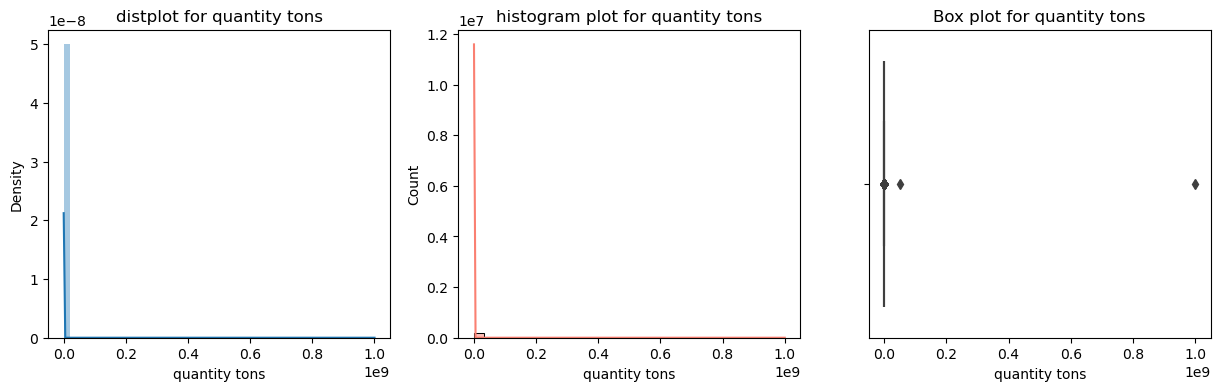

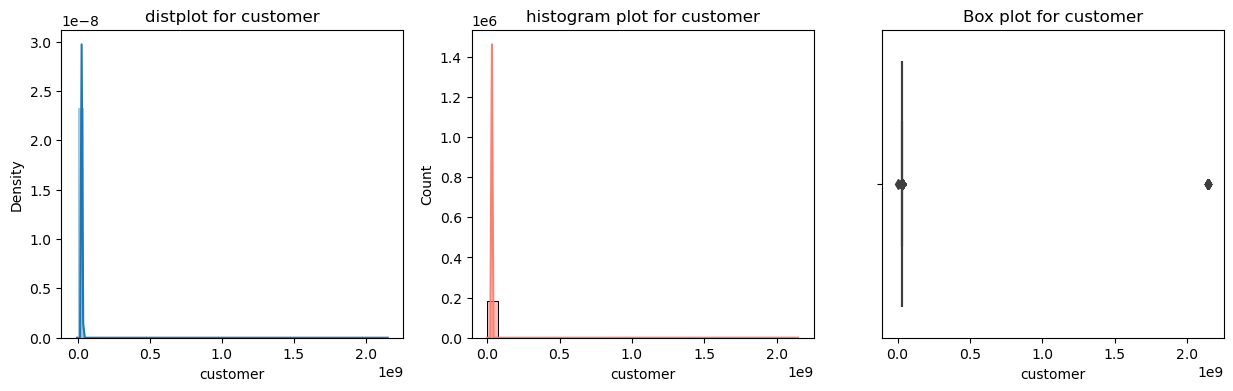

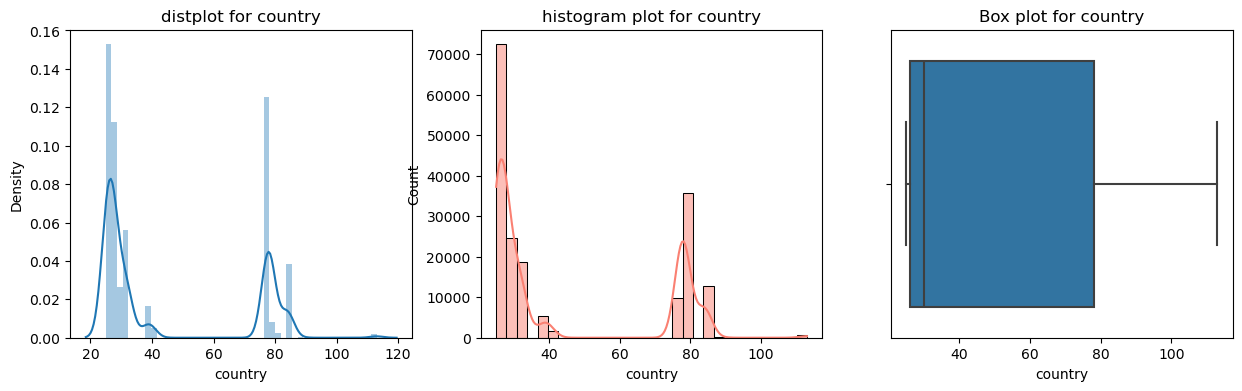

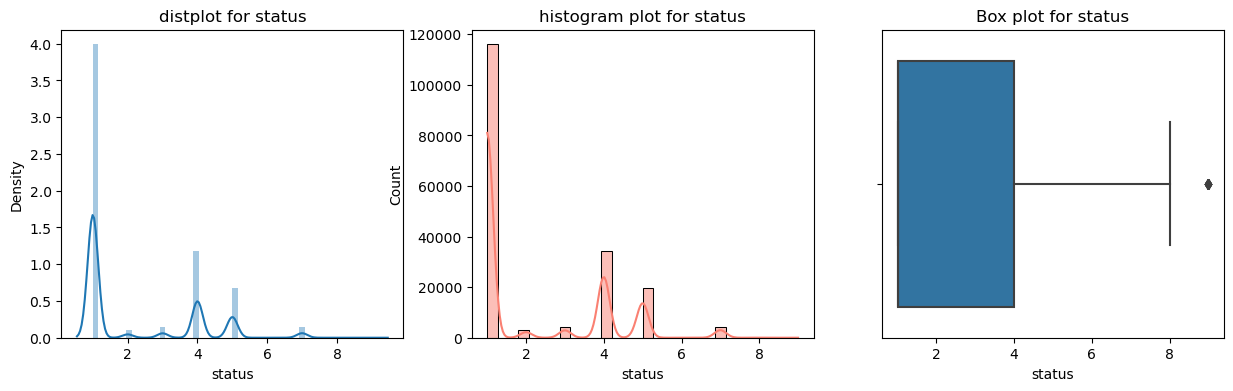

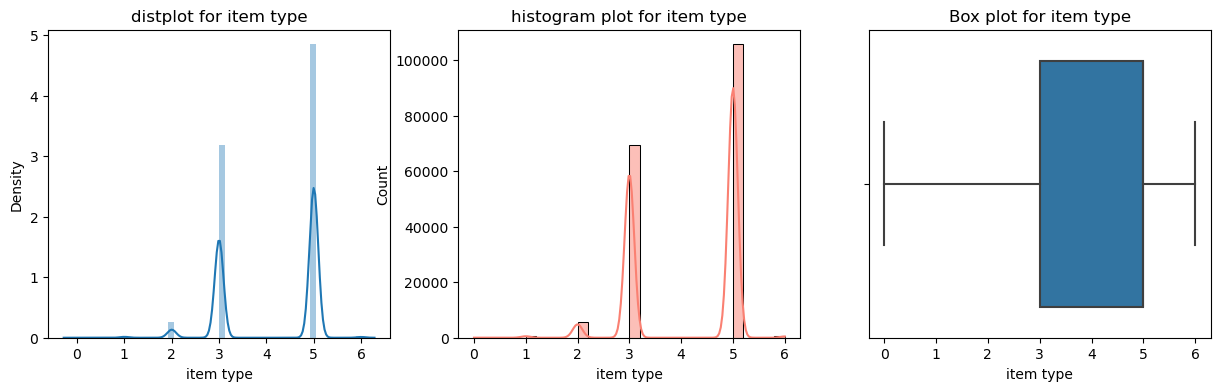

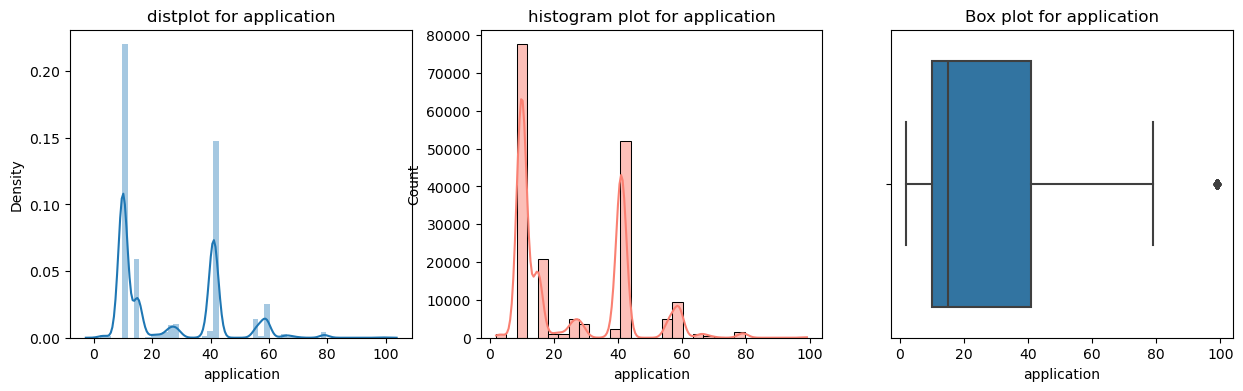

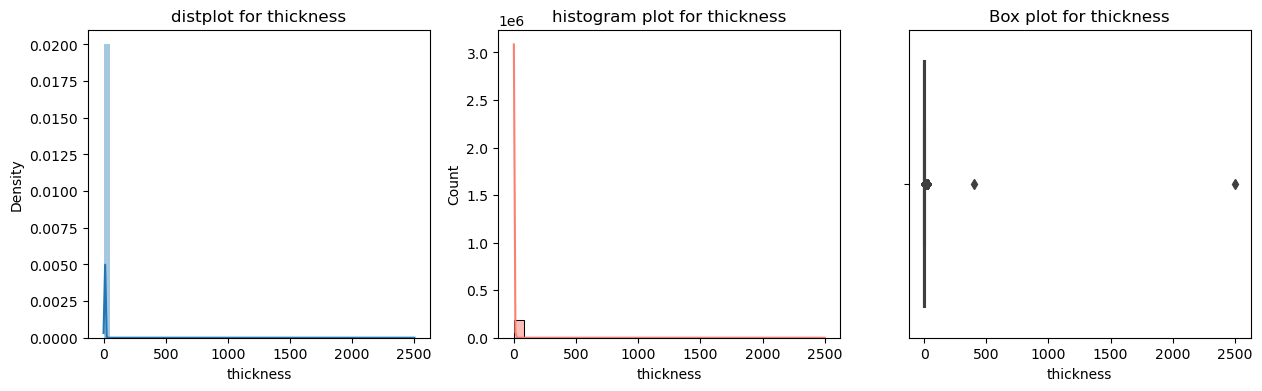

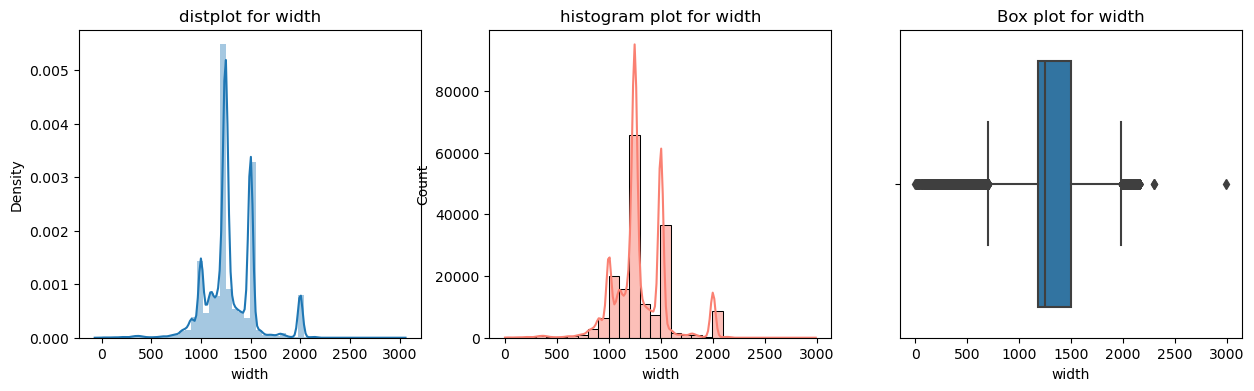

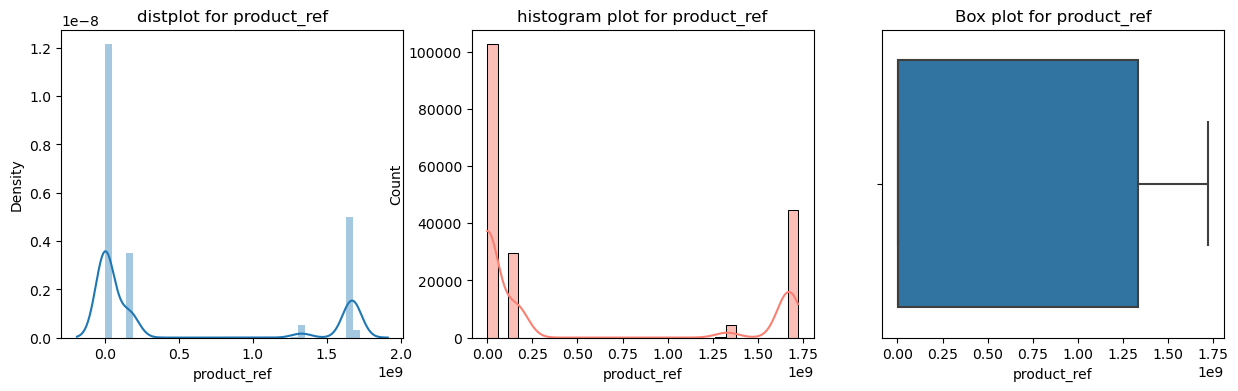

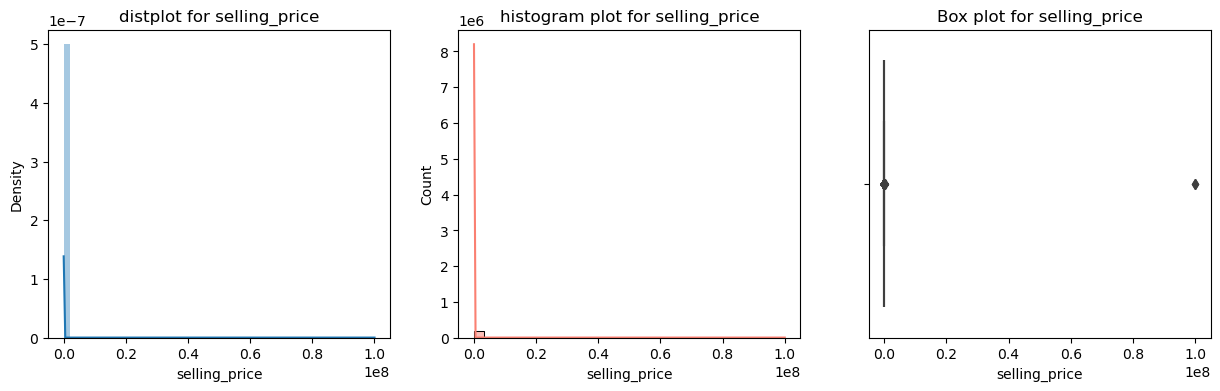

In [37]:
for i in skewed_columns :
    plot(df,i)

In [38]:
# skewed columns are :
# quantity tons
# customer
# thickness
# selling price


In [39]:
df1 = df.copy()

In [40]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [41]:
df1['quantity_tons_log'] = np.log(df1['quantity tons'])
df1['customer_log'] =  np.log(df1['customer'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] =  np.log(df1['selling_price'])

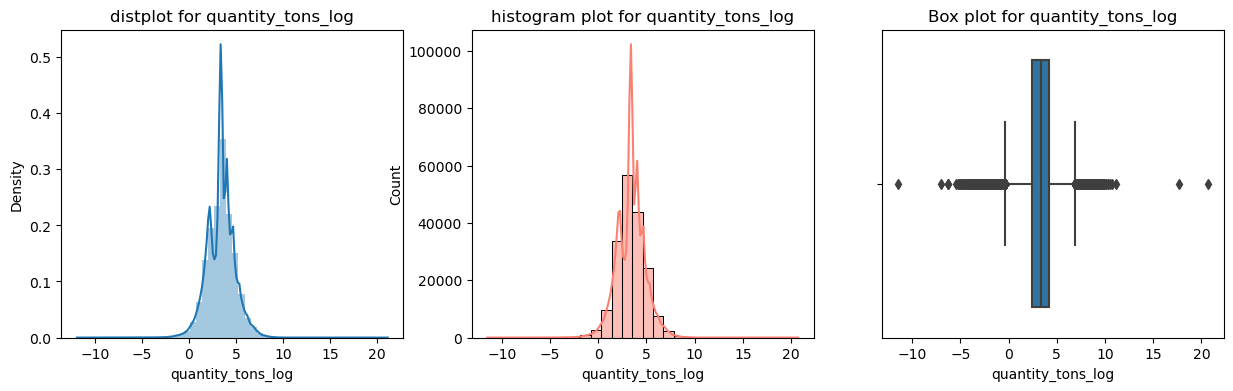

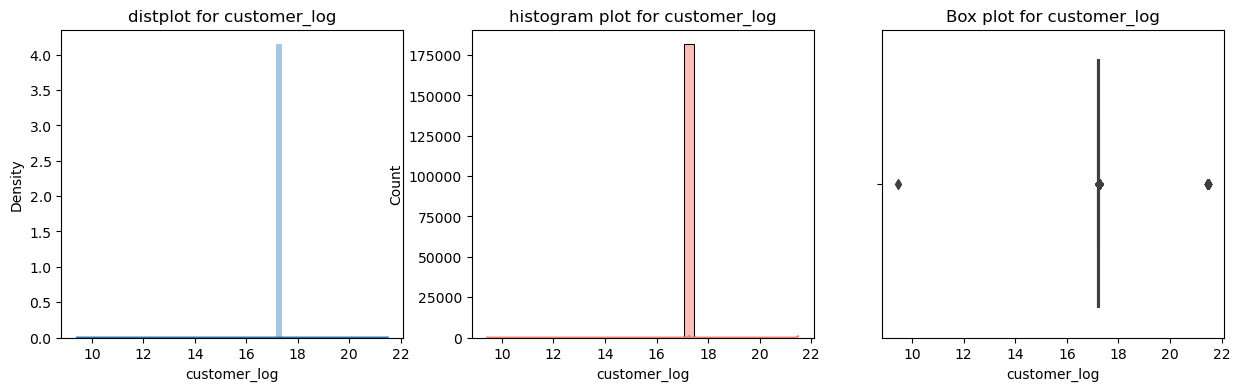

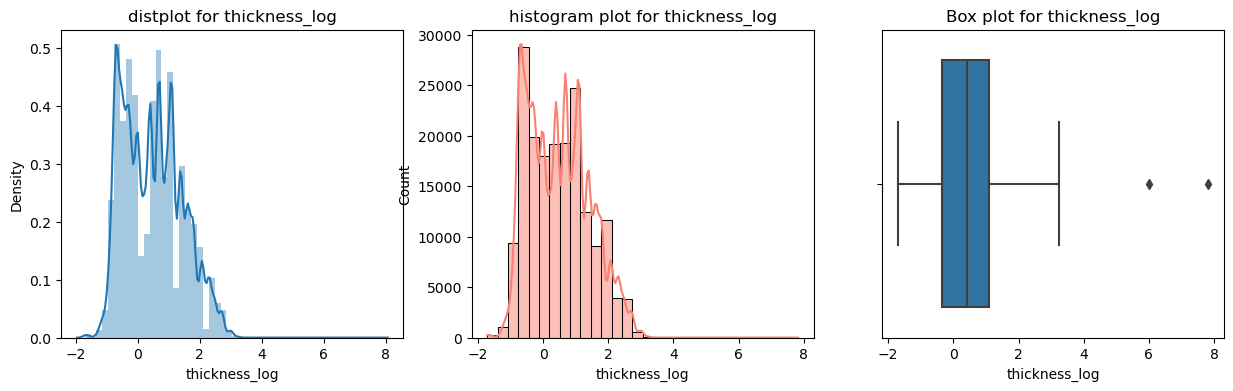

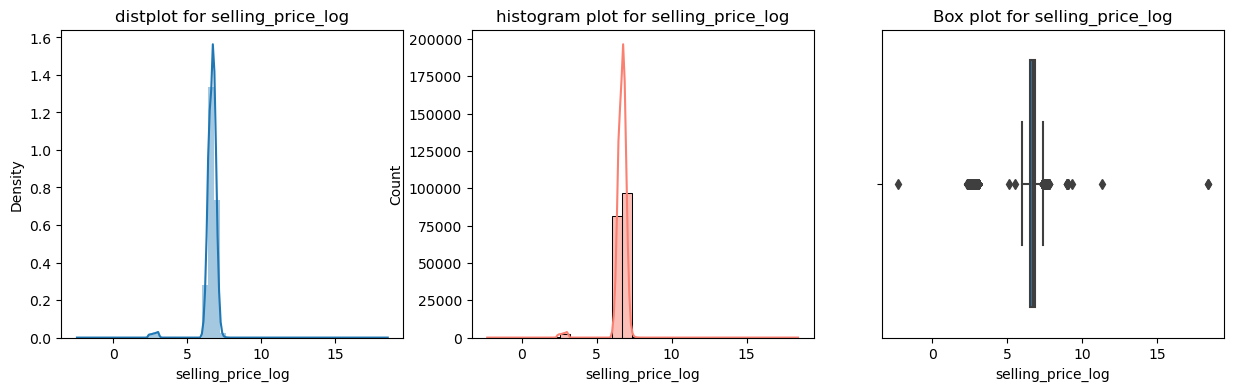

In [42]:
skewed_columns2 = [ "quantity_tons_log", "customer_log", "thickness_log", "selling_price_log" ]

for i in skewed_columns2 :
    plot(df1, i)

In [43]:
# Outliers handling - Inter Quartile Range (IQR) range

In [44]:
df2 = df1.copy()

In [45]:
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [46]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [47]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [48]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,2.206552e+00,1.717110e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,9.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [49]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [50]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(df2,i)

In [51]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,2.206552e+00,1.717110e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,9.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


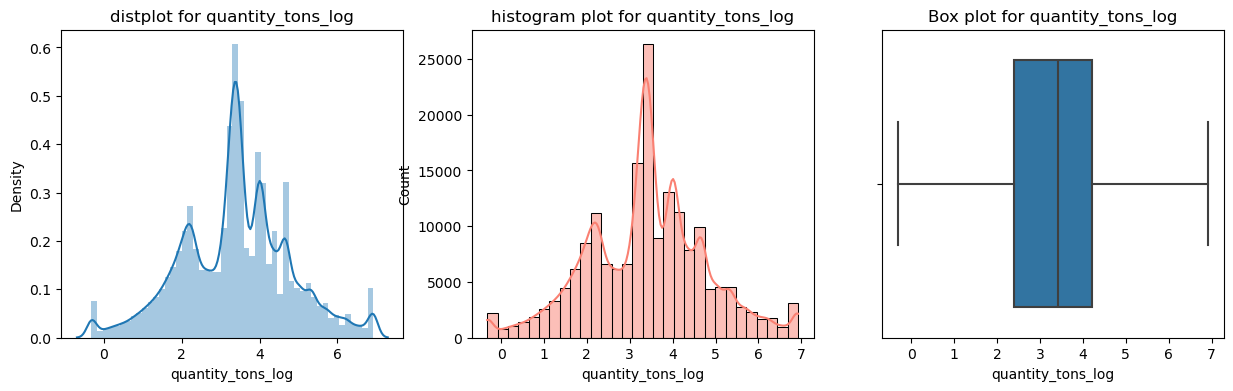

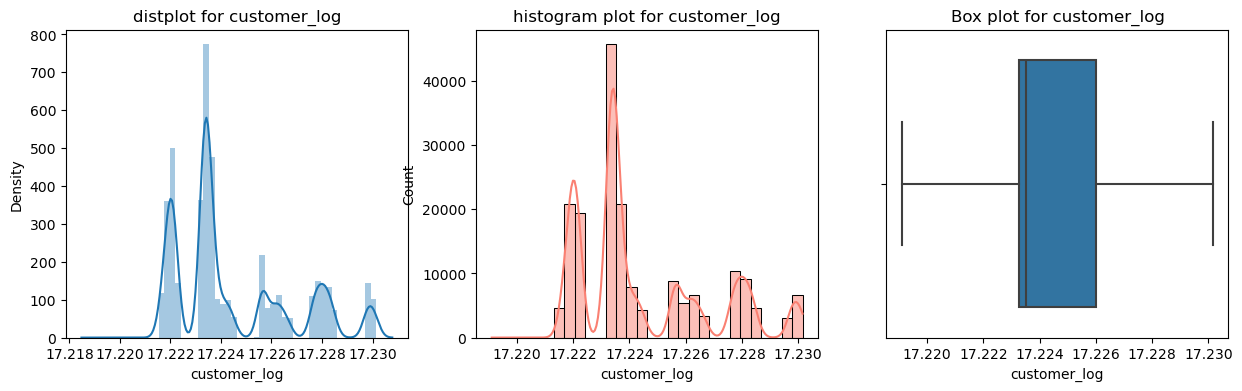

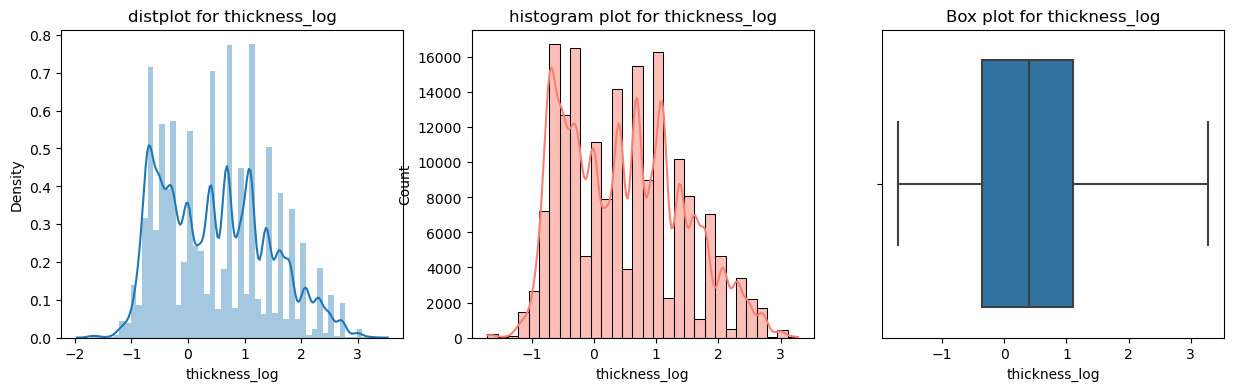

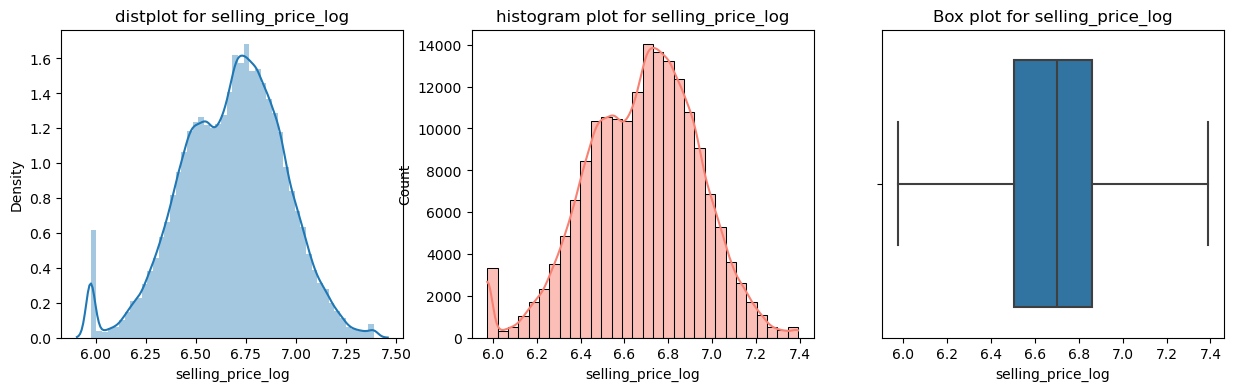

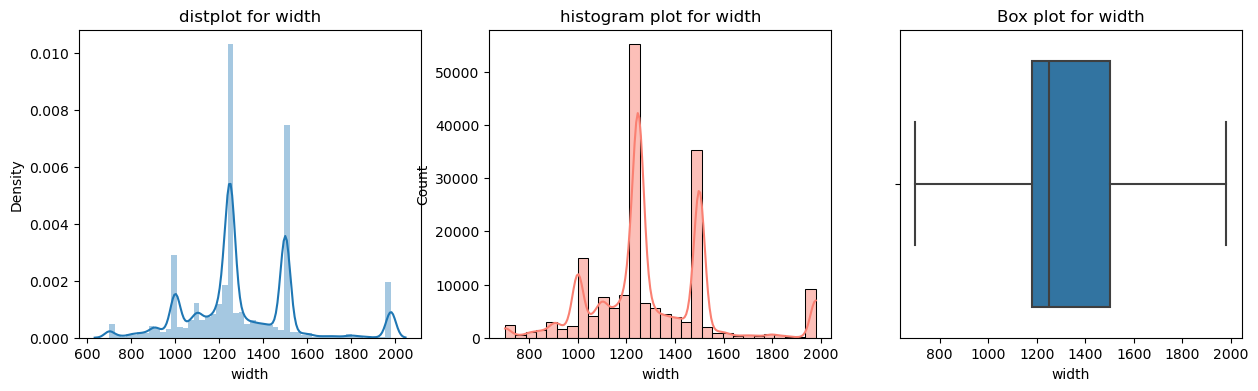

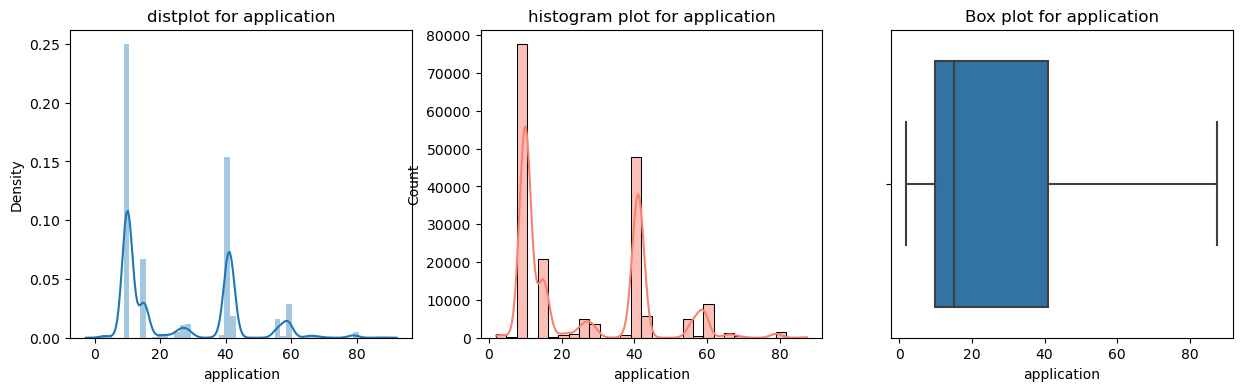

In [52]:
for i in outlier_columns:
  plot(df2,i)

In [53]:
# Dropping the unwanted skewed column
# Skewed columns :
# Quantity tons
# Customer
# Thickness
# Selling Price

In [54]:
df3 = df2.drop(columns = ['quantity tons', 'customer', 'thickness', 'selling_price'])

In [55]:
df3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


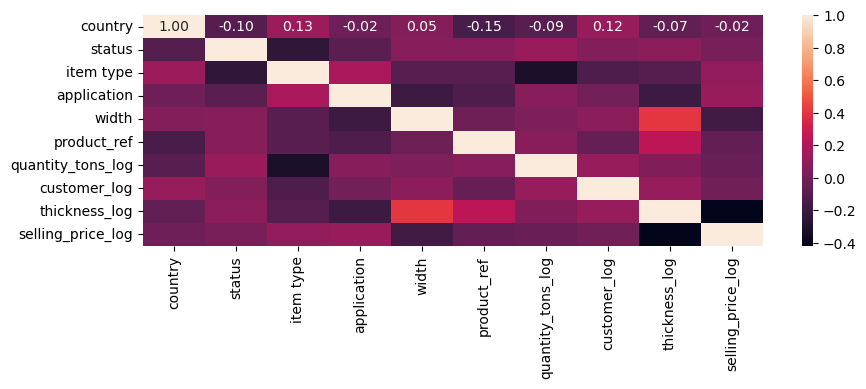

In [56]:
# Checking the correlation with using the "Heatmap":

corr= df3.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [57]:
# the high correlations are "-0.42", "0.40", "-0.32", "-0.20","0.23"

# WRONG DELIVERY DATE HANDLING USING "ML" PREDICTION:

In [59]:
df4 = df3.copy()

In [60]:
df4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [61]:
# Converting the datatypes(object to datetime format)

df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])
df4['delivery_date_1'] = pd.to_datetime(df4['delivery_date_1'])

In [62]:
# Identifying the difference between the "delivery date" and the "item date"

df4['date_differ'] = (df4['delivery_date_1'] - df4['item_date_1']).dt.days

In [63]:
df4['date_differ']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181673, dtype: int64

In [64]:
# Some values have a negative values
# it means the "delivery date" provides, the previous date than the "item date"
# This is not possible, so we have to predict the delivery date for some values

In [65]:
# creating another 3 column from item_date_1
# It is useful for the delivery date prediction

df4['item_date_days'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year


In [66]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_days,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [67]:
# Separating the positive values(pv) Dataframe and negative values(nv) dataframe based on date_differ column :

df4_pv = df4[df4['date_differ'] >= 0]
df4_pv.reset_index(drop = True, inplace = True)

In [68]:
df4_pv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_days,item_date_month,item_date_year
165560,20200702.0,25.0,4,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,4,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,4,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,4,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,4,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [69]:
df4_nv = df4[df4['date_differ']<0]
df4_nv.reset_index(drop = True, inplace = True)

In [70]:
df4_nv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_days,item_date_month,item_date_year
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [71]:
# Now we want to create the model for Delivery date prediction:
# Importing the libraries :

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [72]:
df4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_days', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [73]:
# Find the best algorithm for the delivery date prediction

def accuracy_date_prediction(df, algorithm):
    x = df.drop(columns = ['date_differ','item_date_1','delivery_date_1'])
    y = df['date_differ']

    # splitting the train, test data:
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Checking the accuracy score:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics = {"R2_Score":r2,
               "Mean_Squared_Error":mse,
               "Root_Mean_Squared_Error":rmse,
               "Mean_Absolute_Error":mae}
    return metrics


In [74]:
print(accuracy_date_prediction(df4_pv, DecisionTreeRegressor))
print(accuracy_date_prediction(df4_pv, RandomForestRegressor))
print(accuracy_date_prediction(df4_pv, ExtraTreesRegressor))
print(accuracy_date_prediction(df4_pv, GradientBoostingRegressor))
print(accuracy_date_prediction(df4_pv, AdaBoostRegressor))
print(accuracy_date_prediction(df4_pv, XGBRegressor))


{'R2_Score': 0.9972702171982537, 'Mean_Squared_Error': 4.235224836167064, 'Root_Mean_Squared_Error': 2.057966189267225, 'Mean_Absolute_Error': 0.015250807839821218}
{'R2_Score': 0.997242103970229, 'Mean_Squared_Error': 4.278842167728686, 'Root_Mean_Squared_Error': 2.068536237953951, 'Mean_Absolute_Error': 0.016849273699151388}
{'R2_Score': 0.9992555897891056, 'Mean_Squared_Error': 1.1549433938332376, 'Root_Mean_Squared_Error': 1.0746829271153597, 'Mean_Absolute_Error': 0.021239392383655995}
{'R2_Score': 0.9853293024387593, 'Mean_Squared_Error': 22.76140894268782, 'Root_Mean_Squared_Error': 4.770891839340714, 'Mean_Absolute_Error': 3.3454518286474584}
{'R2_Score': 0.7519420605091882, 'Mean_Squared_Error': 384.85887795463174, 'Root_Mean_Squared_Error': 19.617820418044197, 'Mean_Absolute_Error': 16.170557885484175}
{'R2_Score': 0.9990511170608466, 'Mean_Squared_Error': 1.4721803463436394, 'Root_Mean_Squared_Error': 1.2133343918078145, 'Mean_Absolute_Error': 0.28170507486126445}


In [75]:
# Random Forest algorithm is low bias and reduce overfitting compared to others

In [76]:
# Model for the Random Forest:

def RandomForest(train_df, test_df):

    x = train_df.drop(columns = ['item_date_1', 'delivery_date_1','date_differ'])
    y = train_df['date_differ']

    # Splitting the date:
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
    model = RandomForestRegressor().fit(x_train, y_train)

    data = test_df.drop(columns=['item_date_1', 'delivery_date_1','date_differ'])

    y_pred = model.predict(data)

    return y_pred

In [77]:
date_difference = RandomForest(df4_pv, df4_nv)

In [78]:
date_difference

array([17.79, 17.72,  0.  , ..., 30.  , 30.  , 30.  ])

In [79]:
# Changing the datatype of "date_differ" from float to int:

date_difference1 = []
for i in date_difference:
    dd = int(round(i,0))
    date_difference1.append(dd)

In [80]:
date_difference1

[18,
 18,
 0,
 18,
 18,
 18,
 18,
 18,
 223,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 1,
 1,
 1,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 6,
 6,
 6,
 7,
 7,
 6,
 6,
 6,
 7,
 7,
 7,
 6,
 6,
 6,
 8,
 8,
 8,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 9,
 9,
 9,
 9,
 9,
 7,
 9,
 1,
 1,
 1,
 1,
 7,
 7,
 7,
 7,
 10,
 10,
 1,
 10,
 13,
 10,
 10,
 10,
 13,
 13,
 13,
 13,
 13,
 11,
 11,
 11,
 11,
 14,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 14,
 11,
 11,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 1,
 13,
 1,
 14,
 1,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 1,
 16,
 14,
 14,
 14,
 16,
 16,
 14,
 15,
 15,
 15,
 17,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 17,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 1

In [81]:
df4_nv['date_differ'] = pd.DataFrame(date_difference1)

In [82]:
df4_nv['date_differ']

0        18
1        18
2         0
3        18
4        18
         ..
16103    30
16104    30
16105    30
16106    30
16107    30
Name: date_differ, Length: 16108, dtype: int64

In [83]:
df4_nv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery_date_1      0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_days       0
item_date_month      0
item_date_year       0
dtype: int64

In [84]:
# Finding the delivery date using "item_date_1" and "date_differ":

def find_delivery_date(item_date, date_differ):
    date = item_date + pd.to_timedelta(date_differ, unit = "D")
    return date

In [85]:
df4_nv['delivery_date_1'] = find_delivery_date(df4_nv['item_date_1'], df4_nv['date_differ'])

In [86]:
# Concatenating two dataframe (df4_pv, df4_nv) based on rows:

df_final = pd.concat([df4_pv, df4_nv], axis = 0, ignore_index= True)

In [87]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_days,item_date_month,item_date_year
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [88]:
# Now we create three new columns using "delivery_date_1":

df_final['delivery_date_day'] = df_final['delivery_date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery_date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery_date_1'].dt.year

In [89]:
df_final.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,...,customer_log,thickness_log,selling_price_log,date_differ,item_date_days,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,0.405465,6.890609,0,1,4,2021,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,...,17.223667,-0.967584,5.975038,91,1,4,2021,1,7,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,...,17.228025,-0.510826,7.217443,91,1,4,2021,1,7,2021


In [90]:
df_final.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_days', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [91]:
# Dropping the unwanted columns :

df_final.drop(columns = ['item_date','delivery date','item_date_1','delivery_date_1', 'date_differ'], inplace = True)

In [92]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_days', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [93]:
# Saving the dataframe:
df_final.to_csv("Industrial_Copper_Colab.csv", index = False)

In [94]:
# Reading the dataframe:
df_final = pd.read_csv(r"C:\Users\ramya\Industrial_Copper_Colab.csv")

In [95]:
# This dataframe can't have null values and categorical values
# So our dataset is ready to ML prediction

In [96]:
# Classification Method  - Prediction(Win \  Loose)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [97]:
df_class = df_final.copy()

In [98]:
df_class['status'].value_counts()

status
1    116012
4     34438
5     19573
7      4276
3      4170
2      3140
8        53
9        10
6         1
Name: count, dtype: int64

In [99]:
# Filtering the status column:
df_c= df_class[(df_class["status"] == 1) | (df_class["status"] != 1)]
df_c['status'] = df_class['status'].apply(lambda x : 0 if x!=1 else 1)

In [100]:
df_c.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_days,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [101]:
df_c["status"].value_counts()

status
1    116012
0     65661
Name: count, dtype: int64

In [102]:
# this is a imbalanced data
# so we want to resambling with "SMOTETomek"

In [103]:
df_c.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_days', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [104]:
x = df_c.drop(columns = ['status'], axis = 1)
y = df_c['status']

In [105]:
x.shape , y.shape 

((181673, 15), (181673,))

In [106]:
x_new, y_new = SMOTETomek().fit_resample(x,y)

In [107]:
x_new.shape, y_new.shape

((226192, 15), (226192,))

In [108]:
y_new.value_counts()

status
1    113096
0    113096
Name: count, dtype: int64

In [109]:
# now the data is balanced
# Now we continue the ML prediction

In [110]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [111]:
print(accuracy_checking(x,y, DecisionTreeClassifier))
print(accuracy_checking(x,y, RandomForestClassifier))
print(accuracy_checking(x,y, ExtraTreesClassifier))
print(accuracy_checking(x,y, AdaBoostClassifier))
print(accuracy_checking(x,y, GradientBoostingClassifier))
print(accuracy_checking(x,y, XGBClassifier))


{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9289115178202835}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.999993119486989, 'Accuracy_Test': 0.9543690656391909}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9577817531305903}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7481869848215883, 'Accuracy_Test': 0.7510939865143801}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.7744705445237997, 'Accuracy_Test': 0.774597495527728}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9122046539790006, 'Accuracy_Test': 0.9006742809962845}


In [112]:
print(accuracy_checking(x_new, y_new, DecisionTreeClassifier))
print(accuracy_checking(x_new, y_new, RandomForestClassifier))
print(accuracy_checking(x_new, y_new, ExtraTreesClassifier))
print(accuracy_checking(x_new, y_new, AdaBoostClassifier))
print(accuracy_checking(x_new, y_new, GradientBoostingClassifier))
print(accuracy_checking(x_new, y_new, XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9479652512212914}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9708879506620394}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9748005039899202}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.730416185418313, 'Accuracy_Test': 0.7305201264395764}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.7698242084961289, 'Accuracy_Test': 0.7715024646875484}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.924919730537764, 'Accuracy_Test': 0.9180132186829948}


In [113]:
# We got good accuracy after oversampling
# RandomForestClassifier and ExtraTreesClassifier are having good testing accuracy score, but in training gets overfitting
# So we want to reduce the overfitting
# RandomForestClassifier is have good interpretability, so i select this algorithm

In [ ]:
# Get the high accuracy using Hyperparameter Tuning Method using of GridsearchCV

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 42)

parameters ={"max_depth" :[2,5,10,20],
             "min_samples_split":[2,5,10],
             "min_samples_leaf":[1,2,4],
             "max_features":['sqrt','log2', None]}

gridsearch = GridSearchCV(RandomForestClassifier(), param_grid = parameters, cv = 5, n_jobs = -1)

gridsearch.fit(x_train, y_train)


In [ ]:
gridsearch.cv_results_

In [ ]:
gridsearch.best_score_

In [ ]:
gridsearch.best_params_

In [114]:
# Passing the best Hypertuning Params in the 
# RandomForest and check the accuracy for training and testing

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 42)

model = RandomForestClassifier(max_depth = 20, max_features = None, min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# checking the accuracy_score for train and test

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test  = accuracy_score(y_test, y_pred_test)

print("Accuracy Score for Train and Test")
print("---------------------------------")
print("Accuracy Train :" , accuracy_train)
print("Accuracy Test  :" , accuracy_test)
print("")

# Confusion matrix and Classification report for test

print("Confusion Matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true = y_test, y_pred = y_pred_test))
print("")
print("Classification report for Test")
print("------------------------------")
print(classification_report(y_true = y_test, y_pred = y_pred_test))

Accuracy Score for Train and Test
---------------------------------
Accuracy Train : 0.9849518935856272
Accuracy Test  : 0.9578682110568315

Confusion Matrix for Test
--------------------------
[[22035   729]
 [ 1177 21298]]

Classification report for Test
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22764
           1       0.97      0.95      0.96     22475

    accuracy                           0.96     45239
   macro avg       0.96      0.96      0.96     45239
weighted avg       0.96      0.96      0.96     45239



In [116]:
# Now the training accuracy overfitting reduced.
# so now the model will predict effectively for the unseen data

In [117]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP, threshold = roc_curve(y_true = y_test, y_score = y_pred_test)
print(threshold)
print(FP)
print(TP)
print("")
auc_curve = auc(x = FP, y =TP)
print("auc_curve: ", auc_curve)

[2 1 0]
[0.         0.03202425 1.        ]
[0.        0.9476307 1.       ]

auc_curve:  0.9578032259823631


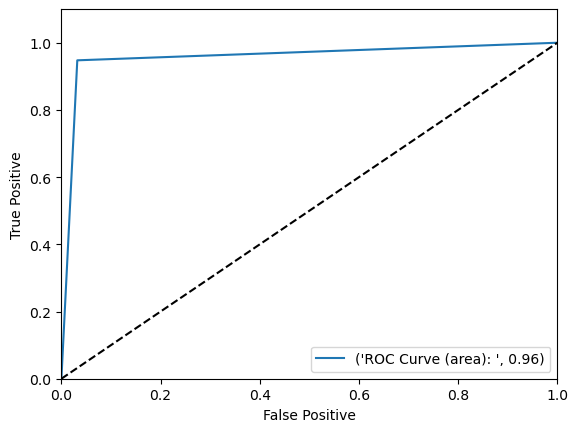

In [118]:
# Create a plot for roc and auc curve:

roc_point = "ROC Curve (area): ",  round(auc_curve, 2)
plt.plot(FP, TP,label = roc_point)
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1], "k--")
plt.legend(loc = "lower right")
plt.show()

In [119]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user = model.predict(user_data)

if y_pred_user == 1 :
    print("Won")
else :
    print("Loose")

Won


In [120]:
# Saving the model using pickle :

with open("Classification_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [121]:
import os

file_location = os.path.abspath("Classification_model.pkl")
print("The model is saved at:", file_location)

The model is saved at: C:\Users\ramya\Classification_model.pkl


In [122]:
with open(r"C:\Users\ramya\Classification_model.pkl", "rb") as f1:
    class_model = pickle.load(f1)

In [123]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user = class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else :
    print("Loose")

Loose


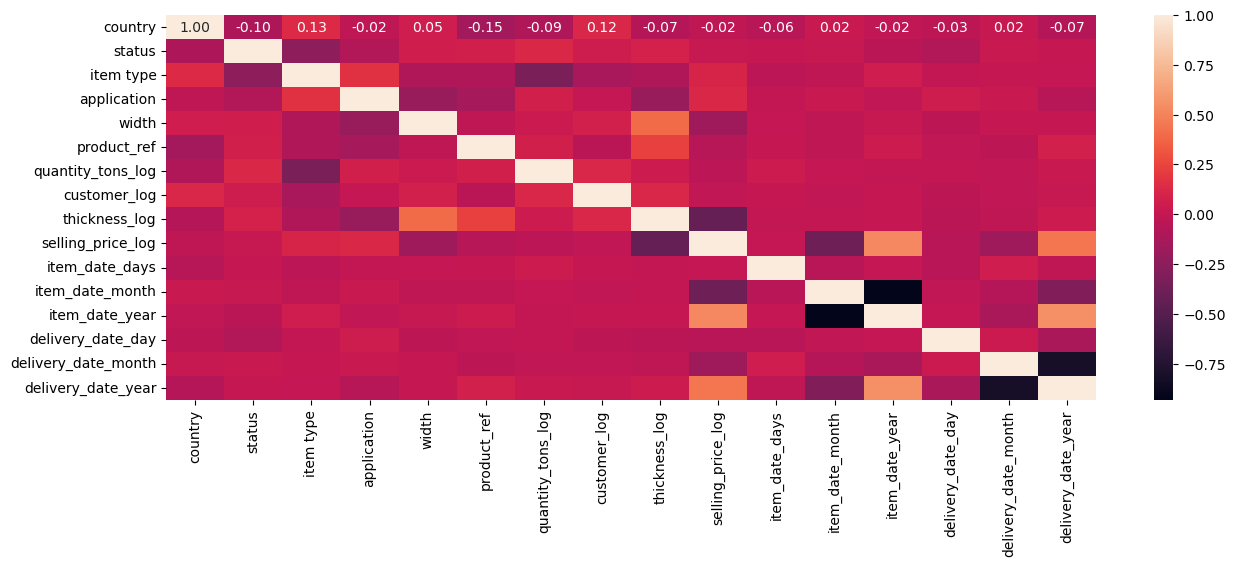

In [124]:
corr = df_final.corr()
plt.figure(figsize = (15,5))
sns.heatmap(corr, annot = True, fmt = "0.2f")
plt.show()

## Regression Method - Selling Price Prediction

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [126]:
df_regg = df_final.copy()

In [127]:
# Find the best ML Model to predict the selling price:

def accuracy_regressor(df, algorithm):
    x = df.drop(columns=['selling_price_log'], axis = 1)
    y = df['selling_price_log']

    # train test split:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test  = r2_score(y_test, y_pred_test)

    metrics = {"Algorithm" : algorithm.__name__,
               "R2_Train" : r2_train,
               "R2_Test" : r2_test}
    return metrics

In [129]:
print(accuracy_regressor(df_regg, DecisionTreeRegressor))
print(accuracy_regressor(df_regg, RandomForestRegressor))
print(accuracy_regressor(df_regg, ExtraTreesRegressor))
print(accuracy_regressor(df_regg, AdaBoostRegressor))
print(accuracy_regressor(df_regg, GradientBoostingRegressor))
print(accuracy_regressor(df_regg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9156425544521463}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9935052925327124, 'R2_Test': 0.9536643224963888}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9556738489321986}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.6266751816856502, 'R2_Test': 0.6257095318850494}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.8885412568648183, 'R2_Test': 0.8888550349915371}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.9529415388999385, 'R2_Test': 0.947082294490711}


In [130]:
# ExtraTreesClassifier and RandomForestClassifier have the good testing accuracy, but overfitting in training accuracy
# RandomForestClassifier have good interpretability, so i select this algorithm

In [ ]:
x = df_regg.drop(columns = ['selling_price_log'], axis = 1)
y = df_regg['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

parameters_r = {"max_depth": [2,4,10,20],
              "min_samples_split": [2,5,10],
              "min_samples_leaf":[1,2,4],
              "max_features":['sqrt', 'log', None]}

gridsearch_r = GridSearchCV(estimator = RandomForestRegressor(), param_grid = parameters_r, cv = 5 , n_jobs = -1)
gridsearch_r.fit(x_train, y_train)

In [ ]:
gridsearch_r.cv_results_

In [ ]:
gridsearch_r.best_score_

In [ ]:
gridsearch_r.best_params_

In [132]:
# Pass The parameters and checking the accuracy of testing , traing and overfitting

x = df_regg.drop(columns = ['selling_price_log'], axis = 1)
y = df_regg['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)

model_r = RandomForestRegressor(max_depth = 20, max_features = None, min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.9855026797159346, 0.9528692025529004)

In [133]:
# Predict the selling price with Hypertuning Parameters and calculate the accuracy using metrics

x = df_regg.drop(columns =['selling_price_log'], axis = 1)
y = df_regg['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 )
model_r = RandomForestRegressor(max_depth = 20, max_features = None, min_samples_split = 2, min_samples_leaf = 1).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {"R2":r2,
           "Mean Squared Error": mse,
           "Root Mean Squared Error": rmse,
           "Mean Absolute Error": mae}

metrics


{'R2': 0.9527055301072196,
 'Mean Squared Error': 0.0031140142190285536,
 'Root Mean Squared Error': 0.055803353116354516,
 'Mean Absolute Error': 0.033013786338646725}

In [134]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)

print("Predicted Selling Price With Log : ", y_pred[0])
print("Predicted Selling Price Without Log : ",np.exp(y_pred[0]) )

Predicted Selling Price With Log :  7.122589490041874
Predicted Selling Price Without Log :  1239.656358614555


In [135]:
with open("Regression_Model.pkl", "wb") as r:
    pickle.dump(model_r, r)
    

In [136]:
with open("Regression_Model.pkl", "rb") as r1:
    regg_model = pickle.load(r1)

In [138]:
df_final.head()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_days,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


In [140]:
user_data = np.array([[30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,1,4,2021,1,7,2021]])
y_pred = model_r.predict(user_data)

print("Predicted Selling Price with Log : ", y_pred[0])
print("Predicted Selling Price without Log : ", np.exp(y_pred[0]))

Predicted Selling Price with Log :  6.0079909911122105
Predicted Selling Price without Log :  406.6655044365547
